# The Ray Tracer Challenge
## A Test-Driven Guide to Your First 3D Renderer
### by James Buck

>Brace yourself for a fun challenge: build a photorealistic 3D renderer from scratch! It’s easier than you think. In just a couple of weeks, build a ray tracer that renders beautiful scenes with shadows, reflections, brilliant refraction effects, and subjects composed of various graphics primitives: spheres, cubes, cylinders, triangles, and more. With each chapter, implement another piece of the puzzle and move the renderer that much further forward. Do all of this in whichever language and environment you prefer, and do it entirely test-first, so you know it’s correct. Recharge yourself with this project’s immense potential for personal exploration, experimentation, and discovery.

Opening quote from the beta ebook copy, September 2018. Publication due November 2018 (now February 2019). For details, see

https://pragprog.com/book/jbtracer/the-ray-tracer-challenge

This Jupyter notebook will serve as a software definition of the ray tracer described in the above book. Code developed in earlier notebooks will be organized, documented and optimized. The workspace exported from this notebook can be used in the test cases defined in the book or used with a set of demonstration scenes associated with each chapter of the book.

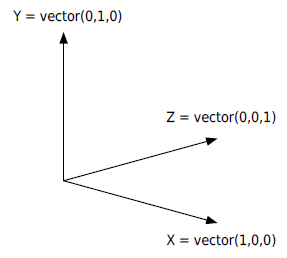


## Conventions
Some of the functions called for in this book are quite simple, and needn't actually be coded as separate functions. The code within them could easily be inserted directly into where the functions are used. To denote this, simple substitutable functions will be referred to as Macros in the function description list. The APL function names will for the most part be the same as those given in the book.

The data structures defined in the book will be represented by nested vectors. For each element of the vector data structure a constant will be defined whose value is the index of the element. These constants will be defined in the form

*object* _ **attribute**

This indexing form will be used throughout, in test cases and in functions. When the code is ready for optimization then the named indices will be replaced by integers.

## Development Approach
This is my third time through the book to produce a ray tracer in Dyalog APL. In this notebook I'll take the code developed in the previous test driven development approach and try to organize and standardize the code. I've managed to work my way up to Chapter 15 of the book, but not all of the functionality in that chapter was completed. I took a quite different approach to Groups defined in Chapter 14. Although Triangles were implemented in Chapter 15, a complete parsing of OBJ 3D files was not completed. Chapter 16, Constructive Solid Geometry was the last remaining chapter, and has not yet been attempted.

I've noted the main problem with the book *The Ray Tracer Challenge* in earlier notebooks. The author develops code and data structures in an iterative fashion which can result in changes to data structures and functions. This in turn can force earlier tests to be rewritten to accomodate changes in function signature. I've decided now to consolidate what has been written into something that is well documented and more understandable on its own. I'll place all of the Chapter tests in a separate notebook for code validation, just as the Demo programs were put in a separate notebook in the last iteration through the book.

The approach I plan to take this time through is to divide the code notebook into three main sections;

- A ***Data Structures*** section that deals with the basic object representations in the ray tracer
- A ***Library Functions*** section devoted to functions that operate on the ray tracer data structures, and
- A ***Ray Tracer Program*** section that defines the ray tracer processing code itself

Keeping the data structure and library functions for ray tracer scenes separate would be worthwhile because of the way the author emphasized an object-oriented approach to developing the ray tracer. Dyalog APL supports OO programming so keeping these together would make an OO rewrite easier. The data structures and library functions themselves will still be in their separate sections but they will be kept together within each section.

Finally, the functions defined here in this notebook are described in some detail in the *Ray Tracer Challenge* book and the pseudo-code for most functions can be found in the Test Cases notebook.

## Lessons
Here's a good place to keep track of things I learn about APL along the way.

1) I was delighted to discover that you can do arithmetic with enclosed arrays (seems I've forgotten the definition of a scalar function!).

Prior to that I would generally disclose, perform the processing then enclose the result. What I found in the **prepare_computations** function was that I could do the following two expressions

```
   Z[hit_point] +← Z[hit_normalv]×EPSILON ⍝ Added for acne
   Z[hit_reflectv]← R[ray_direction] reflect Z[hit_normalv]
```

The five values in the above two expressions are all enclosed values in nested vectors. Neat! I'll have to review my old code and fix it up.

2) I discovered that def'ns are tail recursive; Great news!
This may be a means of implementing the recursive limit on calls without the RECURSE external variable, or at least something that can be used in the future.

3) I finally remembered the command for accessing an element from a nested array: **Pick**. Go back to my code and tests and use Pick instead of various Index arrangements. For example

```
1 1 group_members ⊃ parser_output
```

4) I was looking for a way to update a value in a nested array and Pick does the trick in an assignment statement. Many of my earlier tests involves extracting a nested structure, updating it, then reinserting it into its parent array. Now I need only do

```
(obj_material material_transparency ⊃ obj)← 0.9
```

5) It looks like I can use the Each (¨) command to turn a function that operates on a scalar into one that operates on an array. For example, to create a list of identity matrices, use

```
idents←{identity¨,⍵}
```

6) A similar way to access nested array elements is **Reach Indexing**.<br>
This method uses a set of indices within parentheses to access elements. So an example similar to the above use of Pick would be as shown below. It has the advantage of accepting a list of indices the same as with Simple Indexing.

```
obj[(obj_material material_reflective)(obj_material material_transparency)]← 0.9 0.9
```

7)Functions defined within dfns don't need braces?<br>
Found an interesting example in the Dyalog forum. The sample function created functions within its body but did not enclose them in braces when assigning them to a local variable. What's more, the two inner functions were invoked within a parenthesized expression that took the argument of the main function. The code was as shown below. Note that '≡/' is really the equal underbar slash character.

```
avg2←{sum←+⌿ ⋄ num←≢ ⋄ (sum÷num)⍵}
avg3←{sum←+⌿ ⋄ num←≢  ⋄ avg←sum÷num ⋄ avg ⍵}
```

## Open Questions/Learning Opportunities
1) I have ***got*** to get a grasp of nested arrays, enclose and disclose! There must be a way of boiling things down to a few simple rules because I spend 90% of my debugging time on this issue! Much of it is a result of trying to build a list, so I think if I look at a list support package I'll get a better idea of how things work. Perhaps even use the package itself.

**Answer:** Indexing returns an enclosed value, Pick returns the unenclosed value.


2) What is the means by which I can replace elements in a nested array? I know I can use dyadic Pick (⊃) to extract a single element. There is I believe a means of doing selective assignment. I'm not sure there is a way to do so via a series of indices though. The **Pick** function is one function for which selective assignment is appropriate, so play with that a bit.<br>

**Answer:** Use a Pick expression in parentheses and assign value(s) to it. Note that the assignment is different from an indexed assignment, which must enclose a non-scalar value. If assigning to an element that is a vector, the vector value doesn't need to be enclosed.

3) How can I place a generalized function reference in a nested vector? I would like to let a user define their own pattern function, but I don't know how to treat a function as a first class object in APL. I'd want the **pattern_at** and **pattern_at_shape** functions to invoke the function a user has defined for their own custom pattern.

## Optimization
When testing is complete, the code can be optimized by

- replacing the "constants" with their numeric values
- combining several expressions into one (initially separated for readability)
- eliminate unnecessary disclose/enclose
- nested indexing in place of disassemble/assemble
- incorporating simple "macros" like point() into the code that uses them
- converting functions used in loops to accept array inputs

I'm quite reluctant to implement the first item in the above list because the use of meaningful variable names in place of numeric index values makes the code much more readable and maintainable. perhaps the support advantages greatly outweigh any speed advantages. I suspect replacing functions like point in other procedures won't help that much if function compilation already does that for me, much like inlining a function. Definitely need to delve into the documentation a bit more.

The real key to improving performance will be to stop thinking in terms of scalar precedural languages and start thinking in terms of array processing. For instance, can an entire image array be processed, or processed a row at a time? How about using the Each operator ¨ in place of a loop? It took years for me to stop writing functional programs in procedural fashion, so I expect the same learning curve for APL.

### Other Ideas
Another idea for optimization comes from the authors web site: cache the inverse of the transform matrix for an object! Simple, given how often it is used. Just need to add an extra field to an object nested vector for the inverse and initialize it to null. In use, check to see if it exists and if so use it; if not create it.

## Managing Tasks
I'll start with a list of tasks to improve the ray tracer code and add notes as the tasks are addressed.

1) ***Swap row and column usage in the canvas data structure.*** - Done<br>
This will impact the **render** function as well as the **canvas_to_ppm** function.

In the *canvas* function I reversed the width and height values (⌽⍵) so that the array would be rows high and columns wide. In the **canvas_to_ppm** function I removed the initial transpose of the canvas because it was no longer needed, but I did need to transpose the shape of the canvas (⍴⍵) when writing out the canvas height and width. In the **render** function, all I needed to do was reverse the indices of the canvas to Z[y+1;x+1] to correctly access the canvas array. I should now be ready to process a row at a time and to put the canvas in an inverted array format.

2) ***Eliminate argument counting residue from function redefinitions.*** - Done<br>
The author redefined the arguments for several functions like **prepare_computations** and **lighting** which would have forced a rewrite of earlier tests. Rather than do that I checked how many arguments were passed and set defaults for some that were not there. Time to fix these two!

The **lighting** function was easy to fix since it is only used in one place and all arguments are supplied. Test cases will need to be modified to add the additional arguments. I'll wait on changing **prepare_computations** until I have refraction working.

3) ***Convert procedural functions to defined functions (d'funs).*** - Mostly done<br>
Candidate conversions include; pattern_at, pattern_at_shape, flatten_group, intersect_world, prepare_computations, lighting and schlick. The **cylinder_intersect** and **cone_intersect** have fairly deep conditional nesting. I'd need to define functions within the main function to properly decompose these into simple d'fns.

The **pattern_at** function was a bit tricky because I rewrote some of the conditional expression, and because the comparisons had to be zero equals and 0 not equal. The **pattern_at_shape** was a no-brainer. The **prepare_computations** function was not too bad. With the **lighting** function I started out with an embedded function but found a better way to code the conditional if-then-else section.

The **intersect_world** function was truely a badass to get working. I had to turn a list of intersection pairs and nulls into a flat list with nulls removed and then sort by intersection distance. I think it would be worthwhile trying to implement this as a tail-recursive function inside an intersect_world wrapper! The **flatten_group** function is also an obvious recursive candidate.

I timed the two versions of **intersect_world** (procedural and dfun) and they took the same amount of time. So I guess it's a matter of taste which approach to use.

4) ***Combine multiple expressions into fewer expressions and temporary variables.*** - Skip<br>
While first writing code I pretty much followed the pseudocode written in the book with all of their short expressions and assignments. I should reduce the number of intermediate expressions and variables and hopefully speed things up.

The **ray_for_pixel** function is a good starting point because it is called for every point in a canvas. Any improvement should be measurable on a large enough canvas. Turns out the smaller version is about 1% *slower* than the longer version. The difference is likely due to differences in starting the stopwatch, so I might as well skip this optimization approach.

5) ***Round color values to zero that are less than EPSILON.*** - Done<br>
After getting refraction working I found the **canvas_to_ppm** function was throwing a DOMAIN ERROR when trying to format (⍕) the color values in the canvas array. There must be some sort of non-numeric value in the canvas. A complex number will cause format to throw a DOMAIN ERROR, so I need to find where that is happening. While examining the data I noticed a lot of very small integer values, so I should probably set any value less than EPSILON to zero. That would also eliminate possible negative values (which shouldn't happen).

6) ***Change the canvas array to an Inverted Table.*** - Done<br>
There was a good presentation on Inverted Tables that demonstrated significant space savings and better processing times. Since I'm processing a canvas a row at a time, I could represent a canvas as a vector of rows and then perform an Each style process on the row. This data representation would make it a little easier to implement anti-aliasing.

I have this working now and it does show some improvement in rendering time, and the improvement improves with the size of the canvas being rendered. For a given test scene a 400 by 200 canvas rendered 30% faster, while an 800 by 400 improved by 103%. Perhaps rather than creating a blank canvas and then replacing pixels, I should try building the canvas on the fly.

Building the canvas data structure a row at a time provided only a small speedup. I'll keep the change anyway. I suspect I can't beat the APL interpreter at optimizing the code I write unless I read more about idioms.

7) ***Update shade_hit to process multiple light sources.***<br>
Multiple **point_light** sources can create interesting shadow patterns. Grouped together, they are a way to implement area light sources so that shadows are diffuse rather than sharp.

8) ***Return a single intersection for shapes that generate only one.*** - Done<br>
Early on in developing the code some shapes like Plane only produced one ray intersection but I was returning two intersections with identical values. I did this to be compatible with the first Sphere shape but also because I was having problems with producing a list with only one element. Go back and generate a single hit list.

I had to return to the original procedural function code to accomplish this. Now **plane_intersect** returns an intersection list with one entry, and **cylinder_intersect/cone_intersect** return only a list of valid intersections, even if just one.

9) ***Implement the true recursive call with recurse limits for color_at.*** - Done!<br>
The author had an unfortunate solution to a recursive loop involving **color_at**, **shade_hit** and the two **reflected_color**/**refracted_color** functions. I've implemented something slightly different that seems to work. I'm thus not too sure this task adds anything to functionality, but it does get rid of a global variable. Might also make a useful exercise in processing multiple arguments, because function forms would change from

- *world* **color_at** *ray* → *color*
- *world* **shade_hit** hit → *color*
- *world* **reflected_color** *comps* → *color*
- *world* **refracted_color** *comps* → *color*

to

- *world* **color_at** *ray* remaining → *color*
- *world* **shade_hit** hit remaining → *color*
- *world* **reflected_color** *comps* *remaining* → *color*
- *world* **refracted_color** *comps* *remaining* → *color*

The first call to **color_at** in **render** will be the one to set the *remaining* argument value to the maximum recursion limit.

This change fixed the problem I was having with objects that were both reflective and transparent. The recursion counting I was using seemed to peter out with the reflection chain and fail to backtrack to the transparency chain. Now it is working, but the time for the Chapter 11 demoprogram at 800x600 increased from 15 minutes to 19 minutes, so time for some speedup changes!

10) ***Convert code to put everything in a namespace.*** - Done<br>
Quite a number of things, like default shapes, are represented as variables rather than as functions. The problem is that if I put all code into a namespace then I can't access these variables implicitly by setting the search path variable ⎕PATH. So creating a sphere would have to be something like ```s← #.RayTracer.sphere``` which is explicitly tied to the namespace containing the code.

There aren't that many items that need to change, and this would be a good preparatory steps towards an object-oriented implementation of the ray tracer. As a bonus I could save the code content to a file using the SALT code management system. I'd need functions for all Shapes, Patterns, Identity4 matrix and World.

11) ***Add a precomputed inverse transform field to shapes and materials.*** - Done<br>
The most significant way to speed up rendering time is to precompute the inverse of transformation matrix at object definition time rather than repeatedly computing it during rendering. Thie has the added advantage of throwing a DOMAIN ERROR during scene definition should the matrix have no inverse rather than in the middle of rendering.

Objects with transform matrices:
+ Shapes: Sphere, Glass Sphere, Plane, Cube, Cylinder, Cone, Group, Triangle, Smooth Triangle
+ Patterns: Stripe, Gradient, Ring, Checker
+ Camera

Functions that use the inverse transform matrix
+ Set matrix: default_world, flatten_group
+ Invert matrix: pattern_at_shape, sphere_normal_at, intersect, normal_at, ray_for_pixel

The results of eliminating all of the transform matrix inversions during rendering and replacing them with precomputed lookups did not have as big an improvement in rendering time as I had hoped. The demo scene from Chapter 11 with Reflection and Transparency at 600x800 went from 19:12 minutes to 17:03 minutes, about a 11% improvement. It requires a little extra work during scene description to have both matrix assignments, so I'll add helper functions.

+ *shape* **add_shape_transform** *transform_matrix* → *shape*
+ *pattern* **add_pattern_transform** *transform_matrix* → *pattern*

These helper functions will assign the given transform matrix and its inverse and return the updated object.

12) ***Profile code to find areas for optimization.***<br>
Learning to use the Dyalog APL profiling tools would be very useful, and here's a chance to start.

## Program Profiling
Program profiling is fairly simple to do. The following command sequence can be used to profile a typical rendering task.

```
⎕PROFILE 'start'
im← w render c
⎕PROFILE 'stop'
]Profile
```

The last statement will pop up a graphic window showing profile data in tabular or piechart form, and will allow you to drill down into each function to see how much time is spent in each statement line.

Single statements can also be profiled. This is useful in testing changes to a single function. For example

```
r← (point 0 0 ¯1) #.RayTracer.ray vector 0 0 1
]runtime "{#.RayTracer.sphere #.RayTracer.sphere_intersect r}¨⍳100000"
```

Two functions rose to the top duing profile, **dot** and **transform**. Since the **dot** function is simply the ```+.×``` expression, the function can be directly replaced with the expression in the seven places it occurs. The **transform** function is a bit more complex but is only used by the **intersect** function. Inlining the two functions seems to have an effect when benchmarking in isolation using ```]runtime``` but has only a small, less than 1% impact on overall rendering time.

One thing that helps is to rewrite the **transform** function to a more efficient form AND substitute it into the **intersect** function. That should result in about a 4% improvement in rendering time. The **transform** function is rewritten from

```transform← {(⍺ +.× ⊃⍵[ray_origin]) (⍺ +.× ⊃⍵[ray_direction])}```

to

```transform← {tm←⍺⋄{tm+.×⍵}¨⍵}```

Note: ***Rewriting individual computations on elements of an array so that is function is applied to each of the elements should provide a guiding example for other optimizations.***

Another interesting takeaway from profiling. I had written the **check_axis** function for cube rendering as taking two arguments on the righthand side. Profiling showed extracting the two arguments as ```(o d)← ⍵``` was taking a significant amount of time, so I rewrote  **check_axis** to do the usual lefthand and righthand argument approach. The result was a nearly 9% improvement in rendering time for the simple Chapter12 demo! See if there are any other simple wins like that.

# Work Environment
Let's put everything into a separate workspace called (naturally) RayTracer. Create the namespace then change into it so that all subsequent variables and functions are created within it. Might as well also name our workspace while we're at it!

In [1]:
)clear
)WSID rtcode_ws
)NS RayTracer
)CS RayTracer

clear ws

was CLEAR WS

#.RayTracer

#.RayTracer

# Data Structures
In this section any data structure that will be used in the definition of a scene will be defined as an APL procedural function or direct function depending on circumstances. I've had many problems with direct functions that do not process arguments, so data structures like *material* or the various Shapes will be implemented as procedural functions.

These are constants or global variables used in the ray tracer code. Some of the so-called data structures in this section are actually APL functions that accept arguments, but are treated as though they are just data structures because they could be implemented as Abstract Data Types in other languages.

In [2]:
FALSE←     0
TRUE←      1
+EPSILON←  0.00001
+INFINITY← 9.9e99
MAX_RECURSION← 5

0.00001

9.9E99

Here are a few global flags to control code execution. Setting flags for evaluating reflection and refraction to FALSE can save rendering time if one or both of these attributes are not present in a scene being rendered.

In [3]:
EVAL_REFLECTION← TRUE
EVAL_REFRACTION← TRUE

## Defining the Ray Tracer Space
A ray tracer operates in a three dimensional space referred to as a scene. Defining that space begins with data structures representing position (*point*) and direction (*vector*). Next, a *ray* is represented by its point of origin (a light source) and its direction. When a ray strikes a scene object, it is characterized as an *intersection* which consists of the object that was struck by a ray and the distance from the ray's origin. For scene processing, this intersection is augmented with additional computed values and referred to as a *hit* which extend the size of the intersection nested vector.

- **point** *x y z*  → x y z 1
- **vector** *x y z* → x y z 0
- *point* **ray** *vector* → ⊂point ⊂vector
- *object* **intersection** *distance* → ⊂object, distance
- **intersections** *intersection* ... *intersection* → sorted intersection list by distance

These are sets of vector index values or identifying constants whose name makes the code context easier to understand. It would be nice if APL had a means of defining true immutable constants. When optimizing inner loops I'll likely leave the original statement as a comment and replace these names with their actual value.

In [4]:
⍝ Ray related constants
ray_origin←    1
ray_direction← 2

⍝ Intersection (hit) related constants
hit_object←   1
hit_distance← 2
⍝ These attributes are added by the prepare_computations function
hit_point←    3
hit_eyev←     4
hit_normalv←  5
hit_inside←   6
hit_reflectv← 7
hit_overpt←   8
hit_underpt←  9
hit_n1←      10
hit_n2←      11

In [5]:
⍝ These are like data structures with initial values
point←{⍵,1}
vector←{⍵,0}

ray← {⍺⍵}
intersection← {⍺⍵}
intersections← {⍵[⍋hit_distance⊃¨⍵]}

## Ray Tracer Object Attributes
The main attributes of objects in a ray tracer scene are color, material, and pattern. Color is represented as a trio of values, Red, Green and Blue (RGB) with a range from 0.0 to 1.0 inclusive. APL will represent a color as a three element numeric array. Given its simplicity no constructor is needed, though it is useful to define a few constants.

In [6]:
red←     1 0 0
green←   0 1 0
blue←    0 0 1
yellow←  1 1 0
cyan←    0 1 1
magenta← 1 0 1
black←   0 0 0
white←   1 1 1

The identity matrix will appear later in the definition of patterns and scene objects.

- **identity** *n* → n×n identity matrix
- *identity4* → 4×4 identity matrix

In [7]:
identity← {⍵ ⍵⍴1,⍵⍴0}

In [8]:
∇Z← identity4
  Z← identity 4
∇

In [9]:
identity4

1 0 0 0
0 1 0 0
0 0 1 0
0 0 0 1

- **material** → *color* *ambient diffuse specular shininess* *reflective refractive transparency*

A material is a key attribute of any shape in a ray tracer scene, and is the basis for color, reflectivity and transparency. This data structure mutated as new attributes were added in the chapters following its first definition. Luckily I could just tack the new attributes on the end of the original nested vector.

I chose to store the *pattern* attribute in the same place as the *color* attribute that it overrides. That means any code processing a material needs to distinguish between the color and material data structures.

In [10]:
⍝ Material indices
material_color←        1
material_ambient←      2
material_diffuse←      3
material_specular←     4
material_shininess←    5
material_pattern←      material_color
material_reflective←   6  ⍝ Reflective 0.0 to 1.0
material_refractive←   7  ⍝ Refractive Index
material_transparency← 8  ⍝ Reflective 0.0 to 1.0

⍝ Default material and a specific one
⍝ material← (1 1 1) 0.1 0.9 0.9 200 0 1.0 0
⍝ glass←    (1 1 1) 0.1 0.9 0.9 200 0 1.5 1

In [11]:
∇Z← material
  Z← (1 1 1) 0.1 0.9 0.9 200 0 1.0 0
∇

In [12]:
∇Z← glass
  Z← (1 1 1) 0.1 0.9 0.9 200 0 1.5 1
∇

In [13]:
material
glass

┌─────┬───┬───┬───┬───┬─┬─┬─┐
│1 1 1│0.1│0.9│0.9│200│0│1│0│
└─────┴───┴───┴───┴───┴─┴─┴─┘

┌─────┬───┬───┬───┬───┬─┬───┬─┐
│1 1 1│0.1│0.9│0.9│200│0│1.5│1│
└─────┴───┴───┴───┴───┴─┴───┴─┘

Patterns are nested arrays with an ID in the first position to identify what type of pattern it is. Chapter 10 suggests creating your own additional patterns, and also allowing patterns to nest so that the color1 and color2 fields could be patterns. Another idea is a pattern with two patterns that are blended together at a given point, i.e. two stripe patterns at 90 degree angles. That could get pretty interesting!

POV-Ray allows you to define your own pattern function. Just add that definition and patterns could be externalized.

- *color* **stripe_pattern** *color* → *pattern*
- *color* **gradient_pattern** *color* → *pattern*
- *color* **ring_pattern** *color* → *pattern*
- *color* **checker_pattern** *color* → *pattern*
- *pattern* **add_pattern_transform** *transform_matrix* → *pattern*

In [14]:
⍝ Pattern array indices
pattern_type←      1
pattern_transform← 2
pattern_inverse←   3
pattern_color1←    4
pattern_color2←    5

⍝ Pattern Type IDs
pat_test←          0
pat_stripe←        1
pat_gradient←      2
pat_ring←          3
pat_checker←       4

⍝ Patterns
⍝ test_pattern←      pat_test identity4 (0 0 0) (1 1 1)
stripe_pattern←    {pat_stripe identity4 identity4 ⍺ ⍵}
gradient_pattern←  {pat_gradient identity4 identity4 ⍺ ⍵}
ring_pattern←      {pat_ring identity4 identity4 ⍺ ⍵}
checker_pattern←   {pat_checker identity4 identity4 ⍺ ⍵}

1 1 1 stripe_pattern 0 0 0

┌─┬───────┬───────┬─────┬─────┐
│1│1 0 0 0│1 0 0 0│1 1 1│0 0 0│
│ │0 1 0 0│0 1 0 0│ │ │
│ │0 0 1 0│0 0 1 0│ │ │
│ │0 0 0 1│0 0 0 1│ │ │
└─┴───────┴───────┴─────┴─────┘

In [15]:
∇Z← test_pattern
  Z← pat_test identity4 identity4 (0 0 0) (1 1 1)
∇

In [16]:
test_pattern

┌─┬───────┬───────┬─────┬─────┐
│0│1 0 0 0│1 0 0 0│0 0 0│1 1 1│
│ │0 1 0 0│0 1 0 0│ │ │
│ │0 0 1 0│0 0 1 0│ │ │
│ │0 0 0 1│0 0 0 1│ │ │
└─┴───────┴───────┴─────┴─────┘

Now that the code uses precomputed inverse transform matrices, this helper function is added so that both the transform matrix and its inverse can be added at the same time.

In [17]:
]dinput
add_pattern_transform←{
  ⍝ pattern  pattern_transform  pattern → pattern
  p← ⍺
  p[pattern_transform]← ⊂⍵
  p[pattern_inverse]← ⊂⌹⍵
  p
  }

## Ray Tracer Scene Objects

The various objects in a ray tracer scene and the constants associated with them. All of these objects are defined as being situated at the origin of a scene with default dimensions. A transform matrix is used to translate, scale or rotate the object to its actual position in a scene, or so you might think as a scene designer. When rendering a scene though, the ray from a point light source is transformed instead, and a check is made to see if the ray intersects the object.

- *sphere* → obj_sphere identity4 material
- *plane* → obj_plane identity4 material
- *cube* → obj_cube identity4 material
- *cylinder* → obj_cylinder identity4 material min max false
- *cone* → obj_cone identity4 material min max false
- *group* → obj_group identity4 ⍬ ⍬
- *shape* **add_shape_transform** *transform_matrix* → *shape*

Note that these shapes are not implemented as functions taking parameterized attributes. Might not be a bad idea though to specify a material at the time a shape is created.

In [18]:
⍝ Object identifier constants
shape_test←       0
shape_sphere←     1
shape_plane←      2
shape_cube←       3
shape_cylinder←   4
shape_cone←       5
shape_group←      6
shape_triangle←   7
shape_smtriangle← 8

⍝ Object index constants
obj_tag←       1
obj_transform← 2
obj_inverse←   3
obj_material←  4

cylinder_minimum← 5
cylinder_maximum← 6
cylinder_closed←  7

cone_minimum← 5
cone_maximum← 6
cone_closed←  7

triangle_points← 5
triangle_edges←  6
triangle_normal← 7

group_members← 5

In [19]:
∇Z← test_shape
  Z← shape_test identity4 identity4 material
∇

In [20]:
∇Z← sphere
  Z← shape_sphere identity4 identity4 material
∇

In [21]:
∇Z← glass_sphere
  Z← shape_sphere identity4 identity4 glass
∇

In [22]:
∇Z← plane
  Z← shape_plane identity4 identity4 material
∇

In [23]:
∇Z← cube
  Z← shape_cube identity4 identity4 material
∇

In [24]:
∇Z← cylinder
  Z← shape_cylinder identity4 identity4 material (¯1×INFINITY) INFINITY FALSE
∇

In [25]:
∇Z← cone
  Z← shape_cone identity4 identity4 material (¯1×INFINITY) INFINITY FALSE
∇

In [26]:
∇Z← group
  Z← shape_group identity4 identity4 ⍬ ⍬
∇

In [27]:
test_shape
sphere
glass_sphere
plane
cube
cylinder
cone
group

┌─┬───────┬───────┬─────────────────────────────┐
│0│1 0 0 0│1 0 0 0│┌─────┬───┬───┬───┬───┬─┬─┬─┐│
│ │0 1 0 0│0 1 0 0││1 1 1│0.1│0.9│0.9│200│0│1│0││
│ │0 0 1 0│0 0 1 0│└─────┴───┴───┴───┴───┴─┴─┴─┘│
│ │0 0 0 1│0 0 0 1│ │
└─┴───────┴───────┴─────────────────────────────┘

┌─┬───────┬───────┬─────────────────────────────┐
│1│1 0 0 0│1 0 0 0│┌─────┬───┬───┬───┬───┬─┬─┬─┐│
│ │0 1 0 0│0 1 0 0││1 1 1│0.1│0.9│0.9│200│0│1│0││
│ │0 0 1 0│0 0 1 0│└─────┴───┴───┴───┴───┴─┴─┴─┘│
│ │0 0 0 1│0 0 0 1│ │
└─┴───────┴───────┴─────────────────────────────┘

┌─┬───────┬───────┬───────────────────────────────┐
│1│1 0 0 0│1 0 0 0│┌─────┬───┬───┬───┬───┬─┬───┬─┐│
│ │0 1 0 0│0 1 0 0││1 1 1│0.1│0.9│0.9│200│0│1.5│1││
│ │0 0 1 0│0 0 1 0│└─────┴───┴───┴───┴───┴─┴───┴─┘│
│ │0 0 0 1│0 0 0 1│ │
└─┴───────┴───────┴───────────────────────────────┘

┌─┬───────┬───────┬─────────────────────────────┐
│2│1 0 0 0│1 0 0 0│┌─────┬───┬───┬───┬───┬─┬─┬─┐│
│ │0 1 0 0│0 1 0 0││1 1 1│0.1│0.9│0.9│200│0│1│0││
│ │0 0 1 0│0 0 1 0│└─────┴───┴───┴───┴───┴─┴─┴─┘│
│ │0 0 0 1│0 0 0 1│ │
└─┴───────┴───────┴─────────────────────────────┘

┌─┬───────┬───────┬─────────────────────────────┐
│3│1 0 0 0│1 0 0 0│┌─────┬───┬───┬───┬───┬─┬─┬─┐│
│ │0 1 0 0│0 1 0 0││1 1 1│0.1│0.9│0.9│200│0│1│0││
│ │0 0 1 0│0 0 1 0│└─────┴───┴───┴───┴───┴─┴─┴─┘│
│ │0 0 0 1│0 0 0 1│ │
└─┴───────┴───────┴─────────────────────────────┘

┌─┬───────┬───────┬─────────────────────────────┬───────┬──────┬─┐
│4│1 0 0 0│1 0 0 0│┌─────┬───┬───┬───┬───┬─┬─┬─┐│¯9.9E99│9.9E99│0│
│ │0 1 0 0│0 1 0 0││1 1 1│0.1│0.9│0.9│200│0│1│0││ │ │ │
│ │0 0 1 0│0 0 1 0│└─────┴───┴───┴───┴───┴─┴─┴─┘│ │ │ │
│ │0 0 0 1│0 0 0 1│ │ │ │ │
└─┴───────┴───────┴─────────────────────────────┴───────┴──────┴─┘

┌─┬───────┬───────┬─────────────────────────────┬───────┬──────┬─┐
│5│1 0 0 0│1 0 0 0│┌─────┬───┬───┬───┬───┬─┬─┬─┐│¯9.9E99│9.9E99│0│
│ │0 1 0 0│0 1 0 0││1 1 1│0.1│0.9│0.9│200│0│1│0││ │ │ │
│ │0 0 1 0│0 0 1 0│└─────┴───┴───┴───┴───┴─┴─┴─┘│ │ │ │
│ │0 0 0 1│0 0 0 1│ │ │ │ │
└─┴───────┴───────┴─────────────────────────────┴───────┴──────┴─┘

┌─┬───────┬───────┬┬┐
│6│1 0 0 0│1 0 0 0│││
│ │0 1 0 0│0 1 0 0│││
│ │0 0 1 0│0 0 1 0│││
│ │0 0 0 1│0 0 0 1│││
└─┴───────┴───────┴┴┘

- **triangle** *point1* *point2* *point3* → shape_triangle identity4 material points edges normalv

The triangle shape is implemented as a function since it must be instantiated with the three points that define the triangle. The fact that a triangle doesn't take default values is because additional attributes are computed at the time of instantiation based on points supplied.

In [28]:
]dinput
triangle←{
  ⍝ triangle  p1 p2 p3 → shape_triangle identity4 material points edges normalv
  edges← (⍵[2]-⍵[1]), (⍵[3]-⍵[1])
  normv← normalize (⊃edges[2]) cross ⊃edges[1]
  shape_triangle identity4 identity4 material (⍵) edges normv
  }

Now that the code uses precomputed inverse transform matrices, this helper function is added so that both the transform matrix and its inverse can be added at the same time.

In [29]:
]dinput
add_shape_transform←{
  ⍝ pattern  pattern_transform  pattern → pattern
  s← ⍺
  s[obj_transform]← ⊂⍵
  s[obj_inverse]← ⊂⌹⍵
  s
  }

## Ray Tracer Visualization Objects
When one describes a scene for a ray tracer there are objects that are needed for rendering, like a light source, camera, and a canvas. These have no physical representation within a scene but are necessary for rendering the scene. A collection of scene objects is referred to as a *world* for the ray tracer.

- **world** → ⍬ ⍬
- **default_world** → (⊂⊂*point_light*) ((*sphere*) (*sphere*))

The *default_world* data structure is only used during testing so it could be discarded from a final ray tracer implementation.

In [30]:
∇Z← world
  Z← ⍬ ⍬
∇

In [31]:
world

┌┬┐
│││
└┴┘

In [32]:
∇Z←default_world ;light;s1;s2;m
   light← (point ¯10 10 ¯10) point_light 1 1 1
   s1← sphere
   m← material
   m[material_color material_diffuse material_specular]← (0.8 1.0 0.6) 0.7 0.2
   s1[obj_material]← ⊂m
   s2← sphere
   s2[obj_transform]← ⊂scaling 0.5 0.5 0.5
   s2[obj_inverse]← ⊂⌹scaling 0.5 0.5 0.5
   Z← world
   Z[1],← ⊂⊂light
   Z[2]← ⊂⊂s1  ⍝ Have to enclose twice!
   Z[2],← ⊂⊂s2
∇

A *canvas* is not an object in a ray tracer scene per se, but it is a part of how one represents a scene.

- **canvas** *width height* → nested matrix of ⍴ = height width, each element being the enclosed color vector (0 0 0)

I reversed the width & height arguments to shape an array, which means width is the number of columns and height is the number of rows. I should consider doing an inverted array to improve speed and storage use.

canvas←{(⌽⍵)⍴⊂0 0 0}

Let's take the old version of canvas and change it to create an inverted matrix.

In [33]:
canvas←{(1↓⍵)⍴⊂(1↑⍵)⍴⊂0 0 0}
canvas 3 2

┌───────────────────┬───────────────────┐
│┌─────┬─────┬─────┐│┌─────┬─────┬─────┐│
││0 0 0│0 0 0│0 0 0│││0 0 0│0 0 0│0 0 0││
│└─────┴─────┴─────┘│└─────┴─────┴─────┘│
└───────────────────┴───────────────────┘

Both *point_light* and *camera* should be considered scene objects, but they are used to render a scene rather than appear in one. Both are treated as data structures because they are usually not modified after creation.

- *point* **point_light** *color* → ⊂*point* ⊂*color*
- **camera** hsize vsize fview → *camera object*

In [34]:
⍝ point light indices
light_point← 1
light_color← 2

⍝ Camera indices
camera_hsize←      1
camera_vsize←      2
camera_fview←      3
camera_transform←  4
camera_inverse←    5
camera_psize←      6
camera_halfw←      7
camera_halfh←      8

In [35]:
⍝ point_light is also a data structure
point_light←{⍺⍵}

In [36]:
∇Z← camera W;half_view;aspect;halfh;halfv;psize
   ⍝ camera  hsize vsize field_of_view → camera_structure
   (hsize vsize fview)← W
   Z←hsize vsize fview (identity 4) (identity 4)
   half_view← 3 ○ 0.5×fview
   aspect← hsize÷vsize
   :If aspect ≥ 1
      halfw← half_view
      halfh← half_view÷aspect
   :Else
      halfw← half_view×aspect
      halfh← half_view
   :EndIf
   psize← 2×halfw÷hsize
   Z←Z,psize,halfw,halfh
   ∇

# Library Functions
These are the functions the author defines in the ray tracer book. I've reorganized the functions so they no longer follow the order in which they were defined in the book. Instead I start with general library functions and place those specifically associated with scene objects at the end of this section. Functions that are directly involved in rendering a scene rather than simply defining it are placed in their own section.

First up are some vector manipulation functions. These are used fairly extensively during rendering.

- **magnitude** *vector* → numeric scalar
- **normalize** *vector* → vector
- *vector* **dot** *vector* → numeric scalar
- *vector* **cross** *vector* → vector

In [37]:
magnitude←{(+/⍵*2)*0.5}
normalize←{⍵÷(+/(⍵*2))*0.5}
dot←{⍺+.×⍵}

In [38]:
]dinput
cross←{
   ⍝ vector  cross  vector → vector
   a←(⍺[2]×⍵[3])-⍺[3]×⍵[2]
   b←(⍺[3]×⍵[1])-⍺[1]×⍵[3]
   c←(⍺[1]×⍵[2])-⍺[2]×⍵[1]
   a,b,c,0
}

These functions are used once in setting up a scene and so would not provide much benefit by being optimized. They are used to build a transform matrix associated with each scene object. It should be noted that a series of matrix multiplications in the book are right associative, that is, A * B * C is evaluated as A * (B * C) which fits APL like a glove. In APL, the above would be written as

A +.× B +.× C

- **translation** *x y z* → 4×4 translation matrix
- **scaling** *x y z* → 4×4 scaling matrix
- **rotation_x** *angle* → 4×4 rotation matrix about the x axis
- **rotation_y** *angle* → 4×4 rotation matrix about the y axis
- **rotation_z** *angle* → 4×4 rotation matrix about the z axis
- **shearing** *xy xz yx yz zx zy* → 4×4 shearing matrix

In [39]:
]dinput
translation←{
   ⍝ translation  x y z → transform_matrix
   idn← identity4
   idn[(1 4) (2 4) (3 4)] ← ⍵
   idn
   }

In [40]:
]dinput
scaling←{
   ⍝ scaling  x y z → transform_matrix
   idn← identity4
   idn[(1 1) (2 2) (3 3)] ← ⍵
   idn
   }

In [41]:
]dinput
rotation_x←{
   ⍝ rotation_x  angle_in_radians → transform_matrix
   idn← identity4
   idn[(2 2) (2 3) (3 2) (3 3)]← (2○⍵) (-(1○⍵)) (1○⍵) (2○⍵)
   idn
   }

In [42]:
]dinput
rotation_y←{
   ⍝ rotation_x  angle_in_radians → transform_matrix
   idn← identity4
   idn[(1 1) (1 3) (3 1) (3 3)]← (2○⍵) (1○⍵) (-(1○⍵)) (2○⍵)
   idn
   }

In [43]:
]dinput
rotation_z←{
   ⍝ rotation_x  angle_in_radians → transform_matrix
   idn← identity4
   idn[(1 1) (1 2) (2 1) (2 2)]← (2○⍵) (-(1○⍵)) (1○⍵) (2○⍵)
   idn
   }

In [44]:
]dinput
shearing←{
   ⍝ shearing  xy xz yx yz zx zy → transform_matrix
   idn← identity4
   idn[(1 2) (1 3) (2 1) (2 3) (3 1) (3 2)]← ⍵
   idn
   }

These functions are used extensively during rendering and so should be examined for improvement. The **position** function takes a ray and returns the point that is a given distance from the ray origin. The **reflect** function computes the new direction of a ray as it bounces off the surface of an object given the vector perpendicular (normal) to the object surface. The **transform** function applies a given transform matrix to both the origin and direction of a ray and returns the new altered ray. Finally, the **hit** function scans a sorted list of intersections and returns the first intersection with a positive distance, or null (⍬) if there aren't any.

- *ray* **position** *time* → point
- *vector* **reflect** *normal* → *vector*
- *tmatrix* **transform** *ray* → new ray
- **hit** *intersection list* → intersection | ⍬

In [45]:
position← {(⊃⍺[ray_origin])+⍵×⊃⍺[ray_direction]}
reflect←{⍺-⍵×2× ⍺ dot ⍵}
⍝transform← {(⍺ +.× ⊃⍵[ray_origin]) (⍺ +.× ⊃⍵[ray_direction])}
transform← {tm←⍺⋄{tm+.×⍵}¨⍵}

In [46]:
]dinput
hit← {
  ⍝ hit  intersection_list → ⍬ or intersection
  ⍬≡⍵:⍬                ⍝ No list, no hit
  l←0≤hit_distance⌷¨⍵  ⍝ Positive distances
  0=∨/l:⍬              ⍝ Return null if none
  ⊃l/⍵                 ⍝ Return first from positives
  }

- **view_transform** from to up → *transform matrix*

The **view_transform** function is used when setting up a camera in a scene. It is used nowhere else. Perhaps it should be incorporated into the *camera* declaration by providing the three additional arguments view_transform accepts.

In [47]:
]dinput
view_transform←{
   ⍝ view_transform from to up → transform_matrix
   (from to up)← ⍵
   forward← normalize to-from
   left← forward cross normalize up
   true_up← left cross forward
   orientation← left[1], left[2], left[3], 0, true_up[1], true_up[2], true_up[3], 0
   orientation,← (-forward[1 2 3]), 0, 0, 0, 0, 1
   orientation← 4 4⍴orientation
   orientation +.× translation -from[1 2 3]
   } 

Patterns are an area where additions can be made to the ray tracer defined by the author. Several suggestions are made, and the POV-RAY ray tracer might be a good place to find more patterns.

- *pattern* **pattern_at** *point* → *color*
- *pattern* **pattern_at_shape** shape *point* → *color*

Both the **pattern_at** and **pattern_at_shape** function would be a good candidate for conversion to a defined function (d'fn).

In [48]:
]dinput
pattern_at←{
  ⍝ pattern  pattern_at  point → color
  tag← pattern_type⊃⍺
  c1← pattern_color1⊃⍺
  c2← pattern_color2⊃⍺
  ⍝ Pattern used during testing
  tag=pat_test: 3↑⍵
  ⍝ Stripe pattern
  (tag=pat_stripe)^0=⌊2|⍵[1]: c1
  (tag=pat_stripe)^0≠⌊2|⍵[1]: c2
  ⍝ Gradient pattern
  tag=pat_gradient: c1+(c2-c1)×⍵[1]-⌊⍵[1]
  ⍝ Ring pattern
  (tag=pat_ring)^0=⌊2|(+/⍵[1 3]×⍵[1 3])*0.5: c1
  (tag=pat_ring)^0≠⌊2|(+/⍵[1 3]×⍵[1 3])*0.5: c2
  ⍝ Checker pattern
  (tag=pat_checker)^0=2|+/⌊3↑⍵: c1
  (tag=pat_checker)^0≠2|+/⌊3↑⍵: c2
  }

In [49]:
]dinput
pattern_at_shape←{
  ⍝ pattern  pattern_at_shape  object point → color
  (obj wpoint)← ⍵
  ⍝ ⍺ pattern_at (⌹⊃⍺[pattern_transform]) +.× (⌹⊃obj[obj_transform]) +.× wpoint
  ⍺ pattern_at (⊃⍺[pattern_inverse]) +.× (⊃obj[obj_inverse]) +.× wpoint
  }

### Scene Object Functions
These functions are directly associated with scene objects and thus would be implemented as object methods if an OO approach is used.

Functions for computing the intersection of a ray with a sphere and the surface normal of a sphere. Each shape requires its own pair of such functions. This might be where the APL class capability could be used to good effect.

- *sphere* **sphere_intersect** *ray* → ⍬ | intersection intersection
- *sphere* **sphere_normal_at** *point* → *vector*

In [50]:
]dinput
sphere_intersect← {
  ⍝ sphere  intersect  ray → ⍬ or intersection_list
  s2r← (⊃⍵[ray_origin]) - 0 0 0 1
  a← (⊃⍵[ray_direction]) dot ⊃⍵[ray_direction]
  b← 2× (⊃⍵[ray_direction]) dot s2r
  c← ¯1+ s2r dot s2r
  d← (b×b)-4×a×c
  d<0: ⍬
  t1← ((-b)-d*0.5)÷2×a  ⍝ Clean this up!!!
  t2← ((-b)+d*0.5)÷2×a
  (⍺ t1) (⍺ t2)
  }

In [51]:
]dinput
sphere_normal_at←{
  ⍝ ⍺=sphere  normal_at  ⍵=point → vector
  on← ⍵ - 0 0 0 1         ⍝ Creates vector from origin
  ⍝ wn← (⍉⌹⊃⍺[obj_transform]) +.× on
  wn← (⍉⊃⍺[obj_inverse]) +.× on
  wn[4]← 0                ⍝ Make world_normal a vector
  normalize wn
  }

A plane always has a fixed normal, so its' **plane_normal_at** function just returns a constant and ignores any arguments. Watch out for using it as a niladic function though!

- *plane* **plane_intersect** *ray* → ⍬ or *intersection* *intersection*
- *plane* **plane_normal_at** *ray* → *vector*

In [52]:
]dinput
plane_intersect←{
   ⍝ plane plane_intersect ray → ⍬ or intersection_list
   ⍝ Must return a list of intersections
   o← ⊃⍵[ray_origin]         ⍝ Ray origin
   d← ⊃⍵[ray_direction]      ⍝ Ray direction
   EPSILON>|d[2]: ⍬          ⍝ No intersection
   t← -(o[2])÷d[2]           ⍝ Distance
   ⍝ Return two instead of one for compatibility with sphere et al
   ⍝ (⍺ t) (⍺ t)               ⍝ Intersection
   ⊂ ⍺ t
   }

The Plane normal_at function accepts a Plane object and a ray, but always returns a constant.

In [53]:
∇Z← OBJ plane_normal_at R
  ⍝ plane  plane_normal_at  ray → vector
  Z←0 1 0 0
  ∇

The cube object has corner cases (har har!) when a ray strikes the edge or corner of the cube. The **check_axis** function is used to check for the condition.

- **check_axis** numeric numeric → numeric numeric
- *cube* **cube_intersection** *ray* → ⍬ or intersection intersection
- *cube* **cube_normal_at** *point* → vector

In [54]:
]dinput
check_axis←{
  ⍝ numeric  check_axis  numeric → numeric numeric
  emin← INFINITY×¯1-⍺
  emax← INFINITY×1-⍺
  (EPSILON>|⍵)^emin>emax: emax emin
  EPSILON>|⍵: emax emin
  tmin← (¯1-⍺)÷⍵
  tmax← (1-⍺)÷⍵
  tmin>tmax: tmax tmin
  tmin tmax
  }

In [55]:
]dinput
cube_intersect←{
  ⍝ cube  cube_intersect  ray → intersection intersection
  ori← ⊃⍵[1]
  dir← ⊃⍵[2]
  xm←  ori[1] check_axis dir[1]
  ym←  ori[2] check_axis dir[2]
  zm←  ori[3] check_axis dir[3]
  tmin← ⌈/xm[1], ym[1], zm[1]
  tmax← ⌊/xm[2], ym[2], zm[2]
  tmin>tmax: ⍬
  (⍺ tmin)(⍺ tmax)
  }

In [56]:
]dinput
cube_normal_at←{
  ⍝ cube  cube_normal_at  point → vector
  maxc← ⌈/|⍵[1 2 3]
  maxc=|⍵[1]: (⍵[1]) 0 0 0 ⍝ vector ⍵[1] 0 0
  maxc=|⍵[2]: 0 (⍵[2]) 0 0 ⍝ vector 0 ⍵[2] 0
  0 0 (⍵[3]) 0             ⍝ vector 0 0 ⍵[3]
  }

Cylinders are somewhat more complex objects. They are oriented so that they are parallel to the y axis (up) and normally extend to infinity in either direction from their origin. When created, the cylinder extents can be defined, and they can be given a cap on the ends rather than being hollow and open. This makes the task of computing an intersection or normal a bit more difficult, with the **check_cap** function being used for end caps.

- *ray* **check_cap** distance → Boolean
- *cylinder* **cylinder_intersection** *ray* → ⍬ or intersection intersection
- *cylinder* **cylinder_normal_at** *point* → vector


In [57]:
]dinput
check_cap←{
  ⍝ ray  check_cap  distance → Boolean
  x← (ray_origin 1⊃⍺) + ⍵× ray_direction 1⊃⍺
  z← (ray_origin 3⊃⍺) + ⍵× ray_direction 3⊃⍺
  1≥(x×x)+z×z
  }

In [58]:
∇Z← CYL intersect_caps R;t
  Z← ⍬
  ⍝ cylinder  intersect_caps  ray → ⍬ or intersection intersection
  :If (0=CYL[cylinder_closed]) ∨ EPSILON>|ray_direction 2⊃R
    :Return
  :EndIf
  ⍝ Check for intersection with lower end
  t← (CYL[cylinder_minimum]-ray_origin 2⊃R)÷ray_direction 2⊃R
  :If R check_cap t
    Z← Z,⊂CYL intersection t
  :EndIf
  t← (CYL[cylinder_maximum]-ray_origin 2⊃R)÷ray_direction 2⊃R
  :If R check_cap t
    Z← Z,⊂CYL intersection t
  :EndIf
  ∇

The number of nested conditionals in the **cylinder_intersect** function would make it a challenge to convert it to a defined function.

In [59]:
∇Z← CYL cylinder_intersect R;a;b;c;disc;t0;t1;y0;y1;t
  ⍝ cylinder  cylinder_intersect  ray → ⍬ or intersection intersection
  Z← ⍬
  a← ((ray_direction 1⊃R)*2)+(ray_direction 3⊃R)*2
  :If EPSILON<|a
    b← (2×(ray_origin 1⊃R)×ray_direction 1⊃R)+2×(ray_origin 3⊃R)×ray_direction 3⊃R
    c← ¯1+((ray_origin 1⊃R)*2)+(ray_origin 3⊃R)*2
    disc← (b*2)-4×a×c
    :If 0<disc
      t0← ((-b)-disc*0.5)÷2×a
      t1← ((-b)+disc*0.5)÷2×a
      :If t0>t1
        t0 t1← t1 t0
      :EndIf
      y0← (ray_origin 2⊃R)+t0×ray_direction 2⊃R
      :If (y0>CYL[cylinder_minimum])^y0<CYL[cylinder_maximum]
        Z← ⊂ CYL intersection t0
      :EndIf
      y1← (ray_origin 2⊃R)+t1×ray_direction 2⊃R
      :If (y1>CYL[cylinder_minimum])^y1<CYL[cylinder_maximum]
        Z← Z,⊂ CYL intersection t1
      :EndIf
    :EndIf
  :EndIf

  ⍝ Check for intersection with caps of closed cylinder
  ⍝ :If CYL[cylinder_closed]^(EPSILON<|2⌷⊃R[ray_direction])
  :If CYL[cylinder_closed]^EPSILON<|ray_direction 2⊃R
    t← (CYL[cylinder_minimum]-ray_origin 2⊃R)÷ray_direction 2⊃R
    :If R check_cap t
      Z← Z,⊂CYL intersection t
    :EndIf
    t← (CYL[cylinder_maximum]-ray_origin 2⊃R)÷ray_direction 2⊃R
    :If R check_cap t
      Z← Z,⊂CYL intersection t
    :EndIf
  :EndIf
  ∇

In [60]:
]dinput
cylinder_normal_at←{
  ⍝ cylinder  cylinder_normal_at  point → vector
  ⍝ dist← (⍵[1]*2)+⍵[3]*2
  dist← +/⍵[1 3]*2
  (⍺[cylinder_closed])^(1>dist) ^ ⍵[2]≥⍺[cylinder_maximum]-EPSILON: vector 0 1 0
  (⍺[cylinder_closed])^(1>dist) ^ ⍵[2]≤EPSILON+⍺[cylinder_minimum]: vector 0 ¯1 0
  vector (⍵[1]) 0 (⍵[3])
  }

- *ray* **check_cap2** distance radius → Boolean
- *cone* **cone_intersection** *ray* → ⍬ or intersection intersection
- *cone* **cone_normal_at** *point* → vector


In [61]:
]dinput
check_cap2←{
  ⍝ ray  check_cap2  distance radius → Boolean
  (d r)← ⍵
  x← (ray_origin 1⊃⍺) + d×ray_direction 1⊃⍺
  z← (ray_origin 3⊃⍺) + d×ray_direction 3⊃⍺
  (r×r)≥(x×x)+z×z
  }

In [62]:
∇Z← C cone_intersect R;a;b;c;disc;t0;t1;y0;y1;t
  ⍝ cone  cone_intersect  ray → ⍬ or intersection intersection
  Z← ⍬
  a← -/(⊃R[ray_direction])*2
  b← -/2×(⊃R[ray_origin])×⊃R[ray_direction]
  c← ⊃R[ray_origin]
  c← -/c[1 2 3]*2
  :If (EPSILON>|a) ^ EPSILON<|b
    t← -c÷2×b
    Z← ⊂C intersection t
  :ElseIf EPSILON<|a
    disc← (b*2)-4×a×c
    :If 0≤disc
      t0← ((-b)-disc*0.5)÷2×a
      t1← ((-b)+disc*0.5)÷2×a
      :If t0>t1
        t0 t1← t1 t0
      :EndIf
      y0← (ray_origin 2⊃R)+t0×ray_direction 2⊃R
      :If (y0>C[cone_minimum])^y0<C[cone_maximum]
        Z← ⊂ C intersection t0
      :EndIf
      y1← (ray_origin 2⊃R)+t1×ray_direction 2⊃R
      :If (y1>C[cone_minimum])^y1<C[cone_maximum]
        Z← Z,⊂ C intersection t1
      :EndIf
    :EndIf
  :EndIf

  ⍝ Check for intersection with caps of closed cylinder
  :If C[cone_closed]^(EPSILON<|ray_direction 2⊃R)
    t← (C[cone_minimum]-ray_origin 2⊃R)÷ray_direction 2⊃R
    :If R check_cap2 t, C[cone_minimum]
      Z← Z,⊂C intersection t
    :EndIf
    t← (C[cone_maximum]-ray_origin 2⊃R)÷ray_direction 2⊃R
    :If R check_cap2 t, C[cone_maximum]
      Z← Z,⊂C intersection t
    :EndIf
  :EndIf
  ∇

In [63]:
]dinput
cone_normal_at←{
  ⍝ cone  cone_normal_at  point → vector
  dist← (⍵[1]*2)+⍵[3]*2
  (⍺[cone_closed]) ^ (1>dist) ^ ⍵[2]≥⍺[cylinder_maximum]-EPSILON: vector 0 1 0
  (⍺[cone_closed]) ^ (1>dist) ^ ⍵[2]≤⍺[cylinder_minimum]+EPSILON: vector 0 ¯1 0
  y← (+/⍵[1 3]*2)*0.5
  ⍵[2]>0: vector (⍵[1]) (¯1×y) (⍵[3])
  vector (⍵[1]) y (⍵[3])
  }

These two functions might be considered a general object superclass method that invokes the specific object method defined earlier.

- object **intersect** *ray* → ⍬ or *intersection* *intersection*
- object **normal_at** *ray* → *vector*


In [64]:
]dinput
intersect←{
   ⍝ object  intersect  ray → ⍬ or intersection list
   t←⍺[obj_tag]
   ⍝ m←⊃⍺[obj_transform]
   ⍝ local_ray← (⌹m) transform ⍵
   ⍝ local_ray← (⊃⍺[obj_inverse]) transform ⍵
   tm← ⊃⍺[obj_inverse]
   local_ray← {tm+.×⍵}¨⍵
   shape_test=t:       local_ray
   shape_sphere=t:     ⍺ sphere_intersect   local_ray
   shape_plane=t:      ⍺ plane_intersect    local_ray
   shape_cube=t:       ⍺ cube_intersect     local_ray
   shape_cylinder=t:   ⍺ cylinder_intersect local_ray
   shape_cone=t:       ⍺ cone_intersect     local_ray
   ⍬
   }

In [65]:
]dinput
normal_at←{
   ⍝ shape normal_at point → vector
   fixup←{
     ⍝ wn← (⍉(⌹⊃⍺[obj_transform])) +.× ⍵
     wn← (⍉⊃⍺[obj_inverse]) +.× ⍵
     wn[4]← 0
     normalize wn
     }
   ⍝ lp← ⍵⌹⊃⍺[obj_transform]   Doesn't work!?
   ⍝ lp← (⌹⊃⍺[obj_transform]) +.× ⍵
   lp← (⊃⍺[obj_inverse]) +.× ⍵
   t←⍺[obj_tag]
   shape_test=t:       ⍺ fixup vector lp[1 2 3]  ⍝ Here, or at end?
   shape_sphere=t:     ⍺ fixup ⍺ sphere_normal_at   lp
   ⍝ Is this correct? plane_normal_at is a constant!
   shape_plane=t:      ⍺ fixup ⍺ plane_normal_at    lp
   shape_cube=t:       ⍺ fixup ⍺ cube_normal_at     lp
   shape_cylinder=t:   ⍺ fixup ⍺ cylinder_normal_at lp
   shape_cone=t:       ⍺ fixup ⍺ cone_normal_at     lp
   shape_triangle=t:   ⍺ triangle_normal_at         lp
   shape_smtriangle=t: ⍺ smtriangle_normal_at       lp
   0 0 0 0
   }

Groups are an object, and Groups can contain other Groups. I really wasn't willing to implement groups the way the author defines them.

- *group*  **flatten_group**  *transform_matrix* → ⍬ or shape list

This function is used in place of the scheme outlined by the author. The author wants every object to point to a possible parent, which would be a group. During rendering, you'd need to check for a parent and apply the parent's transform before doing the object's transform. And this can be recursive. To avoid all of those matrix multiplications during rendering I've added this function that applies the transform to objects in a group and returns an object list ready to be added to a World. This way all the transforms can be precomputed before rendering.

Something I may consider adding is a group *material* which is by default null (⍬). If the attribute is populated though, I could apply it to every object in the group. I would do this to support material for triangle groups from Chapter 15. Should it override a material defined in a subgroup though? I think not, unless the subgroup lacks its own material definition.

This really should be rewritten as a d'fns using the Each operator or as a tail-recursive function.

In [66]:
∇ Z← G flatten_group T;gt;objs;objs
  ⍝ group  flatten_group  transform → list_of_shapes
  Z← ⍬
  objs← ⊃G[group_members]
  gt← ⊃G[obj_transform]
  :For obj :In objs
    :If shape_group=obj[obj_tag]
      Z,← obj flatten_group gt
    :Else
      obj[obj_transform]← ⊂T +.× gt +.× ⊃obj[obj_transform]
      obj[obj_inverse]← ⊂⌹⊃obj[obj_transform]
      Z,← ⊂obj
    :EndIf
  :EndFor
  ∇

The **group_intersect** is included here even though I don't plan to use it anywhere. Might be useful though if I implement the author's group scheme (unlikely!).

In [67]:
∇ Z← G group_intersect R;obj
  ⍝ group  group_intersect  ray → ⍬ or intersection_list
  Z← ⍬
  :If ⍬≢⊃G[group_members]
    :For obj :In ⊃G[group_members]
      Z,← obj intersect R
    :EndFor
    :If ⍬≢Z
      Z← Z[⍋2⌷¨Z]
    :EndIf
  :EndIf
  ∇

# Ray Tracer Program
The functions in this section, starting with the **render** function, are directly involved in rendering a scene and saving the result to a PPM graphic file.

One of the first things the author chose to do was implement functions to create a PPM graphics file. The way a canvas is defined should probably be altered to eliminate the use of the transpose function in the **canvas_to_ppm** function.

- **canvas_to_ppm** *canvas* → textual representation of a PPM file
- *filename* **savePPM** *ppm* → file.ppm written to file system

```
]dinput
canvas_to_ppm←{
   ⍝ Truncate negative numbers to zero, limit maximum to 255
   nums← ⊃,/,255⌊⌈255×0⌈⍵
   shape← (⌊(⍴nums)÷15),15
   head← 4 0 ⍕ shape ⍴ nums
   tail← 4 0 ⍕ (-(⍴nums)-×/shape)↑nums
   ⍝ Must transpose ⍴⍵ to get width/height from columns/rows
   0=⍴tail: 4 1 ⍴ 'P3' (⍕⌽⍴⍵) '255' head
   5 1⍴ 'P3' (⍕⍴⍵) '255' head tail
}
```

To process the new inverted matrix canvas data structure we need to change the way the numeric values are flattened to create *num* and the way the width and height dimensions are determined.

In [68]:
]dinput
canvas_to_ppm←{
   ⍝ Truncate negative numbers to zero, limit maximum to 255
   nums← ⊃,/⊃,/255⌊⌈255×0⌈⍵
   shape← (⌊(⍴nums)÷15),15
   head← 4 0 ⍕ shape ⍴ nums
   tail← 4 0 ⍕ (-(⍴nums)-×/shape)↑nums
   ⍝ Must transpose ⍴⍵ to get width/height from columns/rows
   0=⍴tail: 4 1 ⍴ 'P3' (⍕(⍴⊃⍵[1]),⍴⍵) '255' head
   5 1⍴ 'P3' (⍕(⍴⊃⍵[1]),⍴⍵) '255' head tail
}

In [69]:
∇ r←text PutText name;tn
     ⍝ Write text to file (must be single byte text)

 :Trap 0
     tn←name ⎕NCREATE 0
 :Else
     tn←name ⎕NTIE 0
     0 ⎕NRESIZE tn
 :EndTrap

 r←text ⎕NAPPEND tn(⎕DR' ')
 ⎕NUNTIE tn
∇

In [70]:
]dinput
savePPM←{
   ⍝ filename  savePPM  output_data
   (s,((1↑⍴s←⍕⍵),1)⍴⎕UCS 10)PutText ⍺
   }

These functions are used extensively during rendering and so should be examined for improvement. In particular, the **render** function is a double-nested loop that wouldn't be out of place in a BASIC program.

- *world* **intersect_world** *ray* → (*intersection*) (*intersection*) ...
- *hit* **prepare_computations** *ray* → augmented *hit*
- **lighting** *m light position eyev normalv* → *color*
- *world* **shade_hit** *ray* → *lighting*
- *world* **color_at** *ray* → *color*
- *camera* **ray_for_pixel** pixel_X pixel_Y → *ray*
- *world* **render** *camera* → *canvas*


```
∇Z← W render C;x;y;r;c
   ⍝ world  render  camera → canvas
   Z← canvas C[camera_hsize], C[camera_vsize]
   ⍝ I changed from ⍳N to ¯1+⍳N and it worked
   :For y :In ¯1+⍳C[camera_vsize]
      :For x :In ¯1+⍳C[camera_hsize]
         ⍝ When this was C ray_for_pixel x-1,y-1 data was skewed
         ⍝ I guess it should have been (x-1),y-1 eh?
         r← C ray_for_pixel x y
         RECURSE← MAX_RECURSION
         c← W color_at r
         ⍝ x=columns, y=rows. Small values to zero.
         Z[y+1;x+1]← ⊂{⍵<EPSILON:0⋄⍵}¨c
      :EndFor
   :EndFor
   ∇
```

Now we need to access individual canvas pixels differently, by first extracting the row, then iterating through the elements of the row. Instead of allocating the entire canvas first (as seen in the 2 commented out lines) I'm allocating one row at a time. Slightly faster.

In [71]:
∇Z← W render C;x;y;r;c;row
   ⍝ world  render  camera → canvas
   ⍝ Z← canvas C[camera_hsize], C[camera_vsize]
   Z← C[camera_vsize]⍴0
   ⍝ I changed from ⍳N to ¯1+⍳N and it worked
   :For y :In ¯1+⍳C[camera_vsize]
      ⍝ row← (y+1)⊃Z
      row← C[camera_hsize]⍴⊂0.0 0.0 0.0
      :For x :In ¯1+⍳C[camera_hsize]
         ⍝ When this was C ray_for_pixel x-1,y-1 data was skewed
         ⍝ I guess it should have been (x-1),y-1 eh?
         r← C ray_for_pixel x y
         c← W color_at r MAX_RECURSION
         ⍝ x=columns, y=rows. Small values to zero.
         row[x+1]← ⊂{⍵<EPSILON:0⋄⍵}¨c
      :EndFor
      Z[y+1]← ⊂row
   :EndFor
   ∇

In [72]:
]dinput
ray_for_pixel←{
   ⍝ camera ray_for_pixel x y → ray
   (px py)← ⍵
   xoffset← ⍺[camera_psize]×px+0.5
   yoffset← ⍺[camera_psize]×py+0.5
   world_x← ⍺[camera_halfw]-xoffset
   world_y← ⍺[camera_halfh]-yoffset
   ⍝ This is actually slightly slower than the above!
   ⍝ world_x← ⍺[camera_halfw]-⍺[camera_psize]×px+0.5
   ⍝ world_y← ⍺[camera_halfh]-⍺[camera_psize]×py+0.5
   ⍝ it←      ⌹⊃⍺[camera_transform]
   it←      ⊃⍺[camera_inverse]
   pixel←   it +.× point world_x world_y ¯1
   origin←  it +.× point 0 0 0
   directn← normalize pixel-origin
   origin ray directn
   }

From testing in Chapter 9 I found that **intersect_world** could return all negative distances, so **hit** would return a null. I wasn't checking for that in **color_at**, which caused prepare_computations to blow up when it called normal_at.

In [73]:
]dinput
color_at←{
   ⍝ world  color_at  ray remaining → color
   (wray remaining)← ⍵
   inter← ⍺ intersect_world wray
   ⍝ Return black if no intersections
   ⍝ 0=≢inter: 0 0 0
   ⍝ Take first positive intersection as the hit
   h← hit inter
   ⍝ Return black if no hit
   0=≢h: 0 0 0
   comps← h prepare_computations wray
   comps← comps compute_n1n2 inter h
   ⍺ shade_hit comps remaining
   }

```∇ Z← W intersect_world R;objs;obj;inter;d;idx
   ⍝ world  intersect_world  ray → intersection_list
   objs←⊃W[2]   ⍝ List of objects
   Z←⍬
   d←⍬
   :For obj :In objs
     inter← obj intersect R
     ⍝:If 2=≢inter
     :If ⍬≢inter   ⍝ Allows for differing # of returned intersections
        ⍝ Z,← inter[1] ⋄ d,← hit_distance⌷⊃inter[1]
        ⍝ Z,← inter[2] ⋄ d,← hit_distance⌷⊃inter[2]
        :For i :In inter
          Z,← ⊂i
          d,← i[hit_distance]
        :EndFor
     :EndIf
   :EndFor
   :If 0≠≢Z
      idx← ⍋d
      Z← Z[idx]
    :EndIf
   ∇```

I've spent hours with this trying to make a d'fun! The dyadic Each took some time to understand and use. Then unpacking the list returned by intersect Each took quite some time to figure out. Now I'm stuck getting rid of nulls and then determining if I have nothing to return. Finally got it working, but only by trial and error! ***Study This!!!***

Used Unique to eliminate duplicate hits from intersect functions that should return one hit but return two instead.

```
]dinput
intersect_world←{
  ⍝ world  intersect_world  ray → ⍬ or sorted intersection list
     ilist←((⍴2⊃⍺)⍴⊂⍵)intersect⍨¨2⊃⍺  ⍝ List of intersection pairs and nulls
     ilist←(~ilist∊⊂⍬)/ilist          ⍝ Remove nulls
     0=≢ilist: ⍬                      ⍝ Return null if no intersections at all
     ilist←(⊃¨1↑¨ilist),⊃¨1↓¨ilist    ⍝ Remove intersections from pairs
     ∪ilist[⍋hit_distance⊃¨ilist]     ⍝ Sort by distance
  }
```

```
⍝ Code to test above function
w← default_world
r← (point 0 0 ¯5) ray vector 0 0 1
w intersect_world r
```

Another attempt to turn intersect_world into a d'fn! This is about the same speed as the procedural function depending on context. Sometimes faster, sometimes slower but doesn't seem to vary more than 1%. I'll keep the function written as a d'fn because it's shorter (and a d'fn!) Constructing the intersection list as a side effect is a bit weird though!

In [74]:
]dinput
intersect_world←{
   ⍝ world  intersect_world  ray → intersection list
     Z←⍬
     objs←⊃⍺[2]
     r←⍵
     fun←{~⍬≡⍵:{Z,←⊂⍵}¨⍵ ⋄ ⍵}
     x←fun¨{⍵ intersect r}¨objs
     ~⍬≡Z:Z[⍋2⊃¨Z]
     ⍬
}


- *intersection* **prepare_computations** *ray* intersection_list → augmented intersection
- *computations* **compute_n1n2** intersection_list *intersection* → *computations*

In the book, the computation done by **compute_n1n2** was done inside of **prepare_computations** but this was a later extension of the prepare_computations function that would have forced the rewrite of earlier tests. I should go ahead and combine things in this notebook. The **color_at** function would need to be suitably modified.

***Finally found a nasty problem computing the hit_reflectv component.*** I forgot to disclose the two arrays before passing them to the **reflect** function. As a result the reflect vector was incorrect. No idea why this didn't cause a fault down the line.

In [75]:
]dinput
prepare_computations←{
⍝ intersection  prepare_computations  ray → hit
   Z← ⍺,0,0,0,0,0,0,0,0,0
   Z[hit_point]←   ⊂ ⍵ position Z[hit_distance]
   Z[hit_eyev]←    -⍵[ray_direction]
   Z[hit_normalv]← ⊂ (⊃Z[hit_object]) normal_at ⊃Z[hit_point]

   Z[hit_inside]← 0> (⊃Z[hit_normalv]) dot ⊃Z[hit_eyev]
   ⍝ Z[hit_normalv]← Z[hit_normalv]×(1 ¯1)[1+hit_inside⊃Z]
   Z[hit_normalv]×← (1 ¯1)[1+hit_inside⊃Z]
   ⍝ Note the arithmetic with enclosed vectors!
   Z[hit_overpt] ←  Z[hit_point]+Z[hit_normalv]×EPSILON ⍝ Added for acne
   Z[hit_underpt] ← Z[hit_point]-Z[hit_normalv]×EPSILON ⍝ Added for acne
   ⍝ I forgot to disclose, causing failure in reflection!
   Z[hit_reflectv]← ⊂ (⊃⍵[ray_direction]) reflect ⊃Z[hit_normalv]
   Z
   }

In [76]:
∇ Z← COMPS compute_n1n2 ARGS;XS;H;i;con;p;obj;last
  ⍝ COMPS  compute_n1n2  XS HIT → COMPS
  ⍝ Compute the n1 and n2 attributes
  ⍝ for a result returned by prepare_computations
  ⍝ Use immediately after prepare_computations
  (XS H)←ARGS
  Z← COMPS
  :If ~EVAL_REFRACTION
    :Return
  :EndIf
  con← ⍬
  :For i :In XS
    obj←⊃i
    ⍝ Compute n1
    :If H≡i
      :If 0=≢con
        Z[hit_n1]← 1.0
      :Else
        last← ⊃¯1↑con
        Z[hit_n1]← ⊂obj_material material_refractive⊃last
      :EndIf
    :EndIf
    ⍝ container and hit
    :If ⍬≡con
      con← ⊂obj  ⍝ containers empty
    :Else
      p← con∊⊂obj  ⍝ see if object already in container
      :If 0=∨/p
        con,← ⊂obj
      :Else
        con← (~p)/con
      :EndIf
    :EndIf
    ⍝ Compute n2
    :If H≡i
      :If 0=≢con
        Z[hit_n2]← 1.0
      :Else
        last← ⊃¯1↑con
        Z[hit_n2]← ⊂obj_material material_refractive⊃last
      :EndIf
      :Leave
    :EndIf
  :EndFor
  ∇

In [77]:
∇Z← lighting Args;matl;point;eyev;normalv;insh;obj;ec;lv;am;ldn;di;f;sp;rv;rde
  (matl light point eyev normalv insh obj)← Args
  :If 3=≢⊃matl[material_color]
    clr← ⊃matl[material_color]
  :Else
    ⍝ None of the earlier test cases have materials with patterns
    clr← (⊃matl[material_color]) pattern_at_shape obj point
  :EndIf
  ec← clr × ⊃light[light_color]      ⍝ Effective color
  lv← normalize (⊃light[light_point])-point
  am← ec × matl[material_ambient]
  ldn← lv dot normalv
  :If insh ∨ ldn<0   ⍝ A little bit quicker checking insh than zeroing above
    di← 0 0 0
    sp← 0 0 0
  :Else
    di← ec×matl[material_diffuse]×ldn
    rv← (-lv) reflect normalv
    rde← (rv dot eyev)
    :If rde ≤ 0
      sp← 0 0 0
    :Else
      f← rde*matl[material_shininess]
      sp← matl[material_specular]×f×⊃light[light_color]
    :EndIf
  :EndIf
  Z← am+di+sp
  ∇

- *world* **is_shadowed** *point* → *Boolean*

In [78]:
]dinput
is_shadowed←{
   ⍝ world  is_shadowed  point → Boolean
   l← ⊃⊃⍺[1]
   v← (⊃l[light_point])-⍵
   dist← magnitude v
   dir← normalize v
   r← ⍵ ray dir
   inter← ⍺ intersect_world r
   h← hit inter
   0=≢h: 0
   h[hit_distance]<dist
   }

- *world* **shade_hit** augmented intersection → *color*
- *world* **reflected_color** *comps* → *color*
- *world* **refracted_color** *comps* → *color*
- **schlick** *computations* → scalar

**Note:** One extension to the ray tracer would be support for multiple lighting sources. For that reason, I made the first element of a World data structure a list of *point_light* structures rather than just a single light source. The **shade_hit** function should iterate through the list of lights, presumably averaging the *surface* value returned by **lighting**.

In [79]:
]dinput
shade_hit←{
⍝ world  shade_hit  comps remaining → color
(comps remaining)← ⍵
   wlight← ⊃⊃⍺[1]
   obj← ⊃comps[hit_object]
   mtrl← ⊃obj[obj_material]
   insh← ⍺ is_shadowed ⊃comps[hit_overpt]
   surface← lighting mtrl wlight (⊃comps[hit_overpt]) (⊃comps[hit_eyev]) (⊃comps[hit_normalv]) insh obj
   reflected← ⍺ reflected_color ⍵
   refracted← ⍺ refracted_color ⍵
   flag← ^/0<mtrl[material_reflective material_transparency]
   reflectance← schlick comps
   1=flag: surface+(refracted×1-reflectance)+reflected×reflectance
   surface+reflected+refracted
   }

In [80]:
]dinput
reflected_color←{
   ⍝ world  reflected_color  comps remaining → color
   ~EVAL_REFLECTION: 0 0 0
   ⍝ Limit recursion. Set RECURSE before calling
   (comps remaining)← ⍵
   0≥remaining: 0 0 0   ⍝ black if too deep
   ⍝
   o← ⊃comps[hit_object]
   m← ⊃o[obj_material]
   0=m[material_reflective]: 0 0 0
   rray← (⊃comps[hit_overpt]) ray ⊃comps[hit_reflectv]
   c← ⍺ color_at rray (remaining-1)
   c × m[material_reflective]
   }

In [81]:
]dinput
refracted_color←{
  ⍝ world  refracted_color  comps → color
  ~EVAL_REFRACTION: 0 0 0
  ⍝ Fixes #5 but breaks #8
  ⍝ Infinite loop: refracted_color, color_at, shade_hit
  (comps remaining)← ⍵
  0≥remaining: 0 0 0  ⍝ Added for Test#5
  ⍝ Black if object is opaque
  0=hit_object obj_material material_transparency⊃comps: 0 0 0

  n_ratio← (hit_n1⊃comps)÷hit_n2⊃comps
  cos_i← (hit_eyev⊃comps) dot hit_normalv⊃comps
  sin2_t← (1-cos_i*2)×n_ratio*2
  ⍝
  1<sin2_t: 0 0 0
  ⍝
  cos_t← (1-sin2_t)*0.5
  dir← ((hit_normalv⊃comps)×((n_ratio×cos_i)-cos_t))-(hit_eyev⊃comps)×n_ratio
  rray← (hit_underpt⊃comps) ray dir
  color← ⍺ color_at rray (remaining-1)
  (hit_object obj_material material_transparency⊃comps) × color
  }

In [82]:
∇ Z← schlick COMPS;cos;n;sin2_t;cos_t;r0
  ⍝ schlick  comps (updated by compute_n1n2)
  cos← (⊃COMPS[hit_eyev]) dot ⊃COMPS[hit_normalv]
  :If COMPS[hit_n1]>COMPS[hit_n2]
    n← COMPS[hit_n1]÷COMPS[hit_n2]
    sin2_t← (1-cos*2)×n*2
    :If sin2_t>1.0
      Z← 1
      :Return
    :EndIf
    cos← (1-sin2_t)*0.5
  :EndIf
  r0← ((COMPS[hit_n1]-COMPS[hit_n2])÷(COMPS[hit_n1]+COMPS[hit_n2]))*2
  Z← r0+(1-r0)×(1-cos)*5
  ∇

# Workspace Management
I can load and save a workspace, which may be the means by which I can separate notebooks containing test cases from a code development notebook. One thing seems notable; reducing the number of cells in a notebook reduces the time it takes to load the notebook. I've been combining multiple related test cases into a single markdown cell and their implementation in another code cell. Well worth continuing to do so.

This workspace save preserves the Namespace arrangement that I've added for the ray tracer code.

In [83]:
⊃1 ⎕NPARTS ''
)cs #
)wsid rtcode_ws
)save
)objects
)fns
)vars

⎕PATH←'RayTracer'

C:/Users/Mark/Jupyter/

#

was rtcode_ws.dws

rtcode_ws.dws saved Mon Apr 29 16:25:09 2019

RayTracer

To save time while working on the code in a chapter, I can load up the previously saved workspace instead of executing all of the above cells. Now that I've put everything in a namespace, I can't seem to load that namespace! I'm now having to load the SALT text file instead. Not a good things since I'm currently creating that file externally in the Dyalog GUI.

A straightforward workspace load does not preserve the Namespace structure of the previously stored workspace!

In [1]:
⊃1 ⎕NPARTS ''

)load rtcode_ws
)cs
)objects
)fns
)vars

C:/Users/Mark/Jupyter/

.\rtcode_ws.dws saved Fri Mar 29 17:58:40 2019

#

RayTracer

If I use SALT to load a previously saved script file, I can recover the Namespace structure of the ray tracer code.

In [2]:
⊃1 ⎕NPARTS ''

⎕SE.SALT.Load 'rtcode_ws'
)cs
)objects
)fns
)vars
⎕PATH←'RayTracer'

C:/Users/Mark/Jupyter/

#

RayTracer

hereDir

It's also worthwhile loading some Dyalog utilities.

In [84]:
⍝ )copy display
)copy dfns time

E:\Mark\APL\Dyalog\APL_Files\dfns.dws saved Sat May 5 02:58:11 2018

# Test Code

In [85]:
)CS #
⎕PATH← 'RayTracer'

floor← plane
p← 0.5 0.5 0.5 checker_pattern 0.75 0.75 0.75
p← p add_pattern_transform (rotation_y 0.3) +.× scaling 0.25 0.25 0.25
m← material
m[RayTracer.material_pattern]← ⊂p
m[RayTracer.material_ambient RayTracer.material_diffuse RayTracer.material_specular]← 0.2 0.9 0
floor[RayTracer.obj_material]← ⊂m

cyl1← cylinder
cyl1[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.75 1
cyl1← cyl1 add_shape_transform (translation ¯1 0 1) +.× scaling 0.5 1 0.5
m← material
m[RayTracer.material_color RayTracer.material_diffuse]← (0 0 0.6) 0.1
m[RayTracer.material_specular RayTracer.material_shininess]← 0.9 300
m[RayTracer.material_reflective]← 0.9
cyl1[RayTracer.obj_material]← ⊂m

⍝ Concentric cylinders
cyl2← cylinder
cyl2[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.2 0
cyl2← cyl2 add_shape_transform (translation 1 0 0) +.× scaling 0.8 1 0.8
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (1 1 0.3) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.8 0.9 300
cyl2[RayTracer.obj_material]← ⊂m

cyl3← cylinder
cyl3[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.3 0
cyl3← cyl3 add_shape_transform (translation 1 0 0) +.× scaling 0.6 1 0.6
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (1 0.9 0.4) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.8 0.9 300
cyl3[RayTracer.obj_material]← ⊂m

cyl4← cylinder
cyl4[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.4 0
cyl4← cyl4 add_shape_transform (translation 1 0 0) +.× scaling 0.4 1 0.4
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (1 0.8 0.5) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.8 0.9 300
cyl4[RayTracer.obj_material]← ⊂m

cyl5← cylinder
cyl5[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.5 1
cyl5← cyl5 add_shape_transform (translation 1 0 0) +.× scaling 0.2 1 0.2
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (1 0.7 0.6) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.8 0.9 300
cyl5[RayTracer.obj_material]← ⊂m

⍝ Decorative cylinders
cyl10← cylinder
cyl10[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.3 1
cyl10← cyl10 add_shape_transform (translation 0 0 ¯0.75) +.× scaling 0.05 1 0.05
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (1 0 0) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.9 0.9 300
cyl10[RayTracer.obj_material]← ⊂m

cyl11← cylinder
cyl11[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.3 1
t← (translation 0 0 ¯2.25) +.× (rotation_y ¯0.15) +.× (translation 0 0 1.5) +.× scaling 0.05 1 0.05
cyl11← cyl11 add_shape_transform t
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (1 1 0) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.9 0.9 300
cyl11[RayTracer.obj_material]← ⊂m

cyl12← cylinder
cyl12[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.3 1
t← (translation 0 0 ¯2.25) +.× (rotation_y ¯0.3) +.× (translation 0 0 1.5) +.× scaling 0.05 1 0.05
cyl12← cyl12 add_shape_transform t
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (0 1 0) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.9 0.9 300
cyl12[RayTracer.obj_material]← ⊂m

cyl13← cylinder
cyl13[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.3 1
t← (translation 0 0 ¯2.25) +.× (rotation_y ¯0.45) +.× (translation 0 0 1.5) +.× scaling 0.05 1 0.05
cyl13← cyl13 add_shape_transform t
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (0 1 1) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.9 0.9 300
cyl13[RayTracer.obj_material]← ⊂m

⍝ Glass cylinder
cyl20← cylinder
cyl20[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0.0001 0.5 1
cyl20← cyl20 add_shape_transform (translation 0 0 ¯1.5) +.× scaling 0.33 1 0.33
m← material
m[RayTracer.material_color RayTracer.material_diffuse]← (0.25 0 0) 0.1
m[RayTracer.material_specular RayTracer.material_shininess]← 0.9 300
m[RayTracer.material_reflective RayTracer.material_transparency RayTracer.material_refractive]← 0.9 0.9 1.5
cyl20[RayTracer.obj_material]← ⊂m


#

In [86]:
w← world
w[1]← ⊂⊂ (point 1 6.9 ¯4.9) RayTracer.point_light 1 1 1
w[2]← ⊂  floor cyl1 cyl2 cyl3 cyl4 cyl5 cyl10 cyl11 cyl12 cyl13 cyl20

c← camera 800 400 (○ 0.1)
c[RayTracer.camera_transform]← ⊂ view_transform (point 8 3.5 ¯9) (point 0 0.3 0) (vector 0 1 0)
c[RayTracer.camera_inverse]← ⊂ ⌹view_transform (point 8 3.5 ¯9) (point 0 0.3 0) (vector 0 1 0)

In [87]:
im← w render #.time c

03:25.25

In [88]:
ppm← canvas_to_ppm im
'cylinders.ppm' savePPM ppm

4032189

I can't seem to get reflection of cylinders correct!

<img src="cylinders2.jpg">

The same obviously holds true of cones.

<img src="cylinders-cone.jpg">

Aha! Problem applied to all objects except Planes. The **Prepare_computations** function wasn't computing the reflection vector reflecv component correctly! Here's the corrected image.

<img src="cylinders.jpg">

## Reflection Test Case
Here's a simple test with different objects to see what is wrong with cylinder reflection

In [52]:
)CS #
⎕PATH← 'RayTracer'

⍝ floor← cylinder  ⍝ Cube reflects OK
⍝ floor← cube  ⍝ Cube reflects OK
⍝ floor← sphere  ⍝ Sphere reflects OK
⍝ floor← floor add_shape_transform (scaling 3 0.1 3)⍝ +.× rotation_x ○ 0.5

floor← plane  ⍝ Plane reflects OK
p← 0.5 0.5 0.5 checker_pattern 0.75 0.75 0.75
p← p add_pattern_transform (rotation_y 0.3) +.× scaling 0.25 0.25 0.25
m← material
m[RayTracer.material_pattern]← ⊂p
m[RayTracer.material_ambient RayTracer.material_diffuse RayTracer.material_specular]← 0.2 0.9 0
m[RayTracer.material_reflective]← 0.9
floor[RayTracer.obj_material]← ⊂m

cyl1← cylinder
cyl1[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.75 1
cyl1← cyl1 add_shape_transform (translation ¯1 0.5 0) +.× (rotation_x ○ 0.5) +.× scaling 0.5 1 0.5
⍝ cyl1← cyl1 add_shape_transform (translation ¯1 0.5 1) +.× scaling 0.5 1 0.5
m← material
m[RayTracer.material_color RayTracer.material_diffuse]← (0 0 0.6) 0.1
m[RayTracer.material_specular RayTracer.material_shininess]← 0.9 300
m[RayTracer.material_reflective]← 0.9
cyl1[RayTracer.obj_material]← ⊂m

⍝ Decorative cylinders
cyl10← cylinder
cyl10[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.3 1
cyl10← cyl10 add_shape_transform (translation ¯1.5 0 ¯0.75) +.× scaling 0.05 1 0.05
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (1 0 0) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.9 0.9 300
m[RayTracer.material_reflective]← 0.9
cyl10[RayTracer.obj_material]← ⊂m

cyl11← cylinder
cyl11[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.3 1
t← (translation 0 0 ¯0.75) +.× (rotation_y ¯0.15) +.× (translation 0 0 1.5) +.× scaling 0.05 1 0.05
cyl11← cyl11 add_shape_transform t
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (1 1 0) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.9 0.9 300
cyl11[RayTracer.obj_material]← ⊂m

cyl12← cylinder
cyl12[RayTracer.cylinder_minimum RayTracer.cylinder_maximum RayTracer.cylinder_closed]← 0 0.3 1
t← (translation 0 0 0.25) +.× (rotation_y ¯0.3) +.× (translation 0 0 1.5) +.× scaling 0.05 1 0.05
cyl12← cyl12 add_shape_transform t
m← material
m[RayTracer.material_color RayTracer.material_ambient]← (0 1 0) 0.1
m[RayTracer.material_diffuse RayTracer.material_specular RayTracer.material_shininess]← 0.9 0.9 300
cyl12[RayTracer.obj_material]← ⊂m


#

In [53]:
w← world
w[1]← ⊂⊂ (point 1 6.9 ¯4.9) RayTracer.point_light 1 1 1
w[2]← ⊂  floor cyl1 cyl10 cyl11 cyl12

c← camera 800 400 (○ 0.1)
c[RayTracer.camera_transform]← ⊂ view_transform (point 8 3.5 ¯9) (point 0 0.3 0) (vector 0 1 0)
c[RayTracer.camera_inverse]← ⊂ ⌹view_transform (point 8 3.5 ¯9) (point 0 0.3 0) (vector 0 1 0)

In [54]:
im← w render #.time c

02:20.53

In [55]:
ppm← canvas_to_ppm im
'refltest.ppm' savePPM ppm

4032189